**Task-2   : Unemployment Analysis**

**Dataset  : Unemployment in India**

  NAME     : RINA GOHIL**


**Import the Unemployment in India Dataset**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as gg
import plotly.express as exp
%matplotlib inline 

In [15]:
df = pd.read_csv("Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


**EDA**

In [16]:
df.tail(1)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [18]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


**Data Preprocessing**

In [19]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [20]:
df = df.rename(columns={df.columns[0]:'State', df.columns[3]:'EUR' , df.columns[4]:'EE',df.columns[5]:'ELPR'})
df.head()

,State,Date,Frequency,EUR,EE,ELPR,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [21]:
df["State"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [22]:
df["Area"].unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [23]:
df.groupby("Area").size()

Area
Rural    359
Urban    381
dtype: int64

In [24]:
df['State'].value_counts()

State
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [25]:
#State with highest unemployment rate
df['State'].value_counts().idxmax()

'Andhra Pradesh'

In [26]:
# State with lowest unemployment rate
df['State'].value_counts().idxmin()

'Chandigarh'

**State with HIGHEST unemployment rate**

In [27]:
average_unemployment_rate = df.groupby('State')['EUR'].mean()
state_with_highest_unemployment = average_unemployment_rate.idxmax()
highest_unemployment_rate = average_unemployment_rate.max()
     
print("State with the highest unemployment rate:", state_with_highest_unemployment)
print("Highest unemployment rate:", highest_unemployment_rate)

State with the highest unemployment rate: Tripura
Highest unemployment rate: 28.350357142857142


**State with LOWEST unemployment rate**

In [28]:
# Find the state with the lowest unemployment rate
state_with_lowest_unemployment = average_unemployment_rate.idxmin()
lowest_unemployment_rate = average_unemployment_rate.min()
     
print("State with the lowest unemployment rate:", state_with_lowest_unemployment)
print("Lowest unemployment rate:", lowest_unemployment_rate)

State with the lowest unemployment rate: Meghalaya
Lowest unemployment rate: 4.7988888888888885


**Data Visualization:-**

**(1). Line Plot Showing Unemployment rate Over Time:**

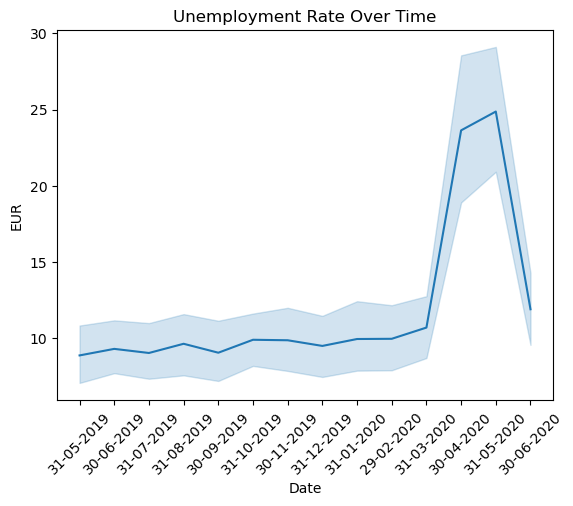

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='Date', y='EUR', data=df)
plt.xticks(rotation=45)
plt.title('Unemployment Rate Over Time')
plt.show()

**(2).Bar plot displaying average unemployment rate by state:**

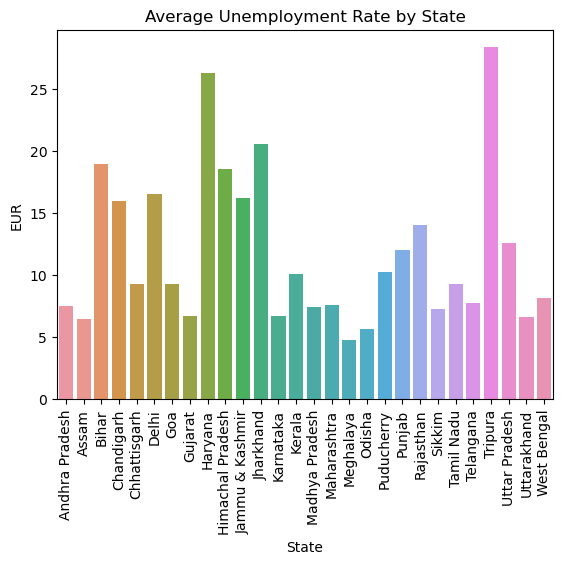

In [30]:
state_avg_unemployment = df.groupby('State')['EUR'].mean().reset_index()
sns.barplot(x='State', y='EUR', data=state_avg_unemployment)
plt.xticks(rotation=90)
plt.title('Average Unemployment Rate by State')
plt.show()

**(3).Scatter plot showing the relationship between unemployment rate and labor participation rate:**

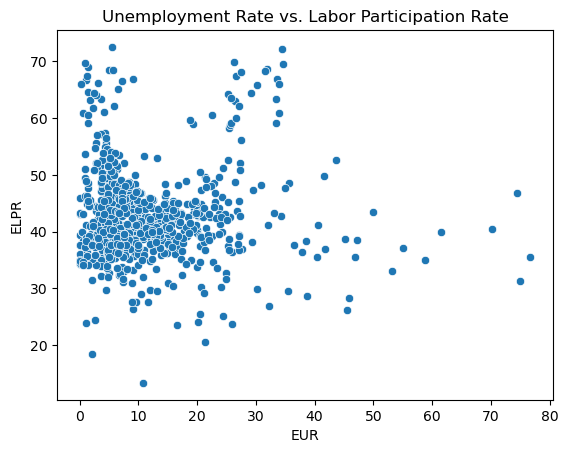

In [31]:
sns.scatterplot(x='EUR', y='ELPR', data=df)
plt.title('Unemployment Rate vs. Labor Participation Rate')
plt.show()     

**(4). Histogram of Unemployment Rate Distribution:**

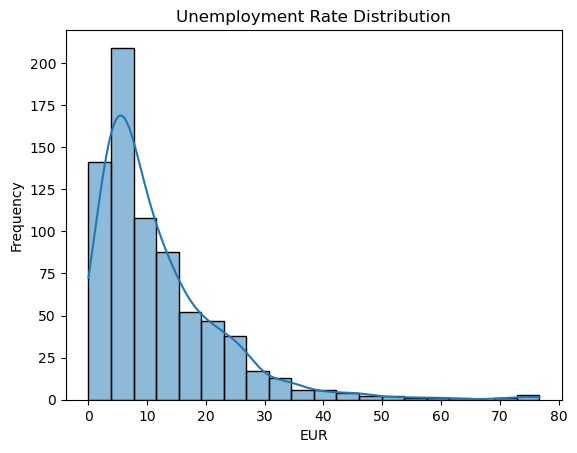

In [32]:
sns.histplot(df['EUR'], bins=20, kde=True)
plt.xlabel('EUR')
plt.ylabel('Frequency')
plt.title('Unemployment Rate Distribution')
plt.show()

**(5). Heatmap of Correlation Matrix:**

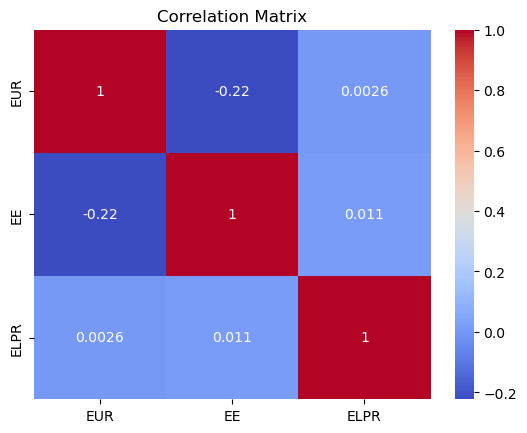

In [33]:
correlation_matrix = df[['EUR', 'EE', 'ELPR']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()